# libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# dataset reading

In [2]:
dataset = pd.read_csv('diabetes_dataset__2019_.csv')

In [3]:
dataset.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [4]:
dataset.isnull().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

# dataset observation

In [5]:
dataset.dtypes

Age                  object
Gender               object
Family_Diabetes      object
highBP               object
PhysicallyActive     object
BMI                 float64
Smoking              object
Alcohol              object
Sleep                 int64
SoundSleep            int64
RegularMedicine      object
JunkFood             object
Stress               object
BPLevel              object
Pregancies          float64
Pdiabetes            object
UriationFreq         object
Diabetic             object
dtype: object

In [6]:
dataset.shape

(952, 18)

In [7]:
dataset.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [8]:
dataset.isnull().any()

Age                 False
Gender              False
Family_Diabetes     False
highBP              False
PhysicallyActive    False
BMI                  True
Smoking             False
Alcohol             False
Sleep               False
SoundSleep          False
RegularMedicine     False
JunkFood            False
Stress              False
BPLevel             False
Pregancies           True
Pdiabetes            True
UriationFreq        False
Diabetic             True
dtype: bool

In [9]:
dataset.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [10]:
dataset.isnull().sum().sum()

48

In [11]:
dataset[dataset['BMI'].isnull()]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
113,less than 40,Female,yes,no,more than half an hr,NaN,no,no,7,6,no,occasionally,not at all,normal,0.0,0,not much,NaN
116,less than 40,Female,no,no,more than half an hr,NaN,no,no,5,4,no,often,very often,normal,0.0,0,not much,no
121,50-59,Female,yes,yes,none,NaN,no,no,6,3,yes,occasionally,always,high,2.0,0,not much,yes
122,less than 40,Male,no,yes,more than half an hr,NaN,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,quite often,no


# dataset visualization

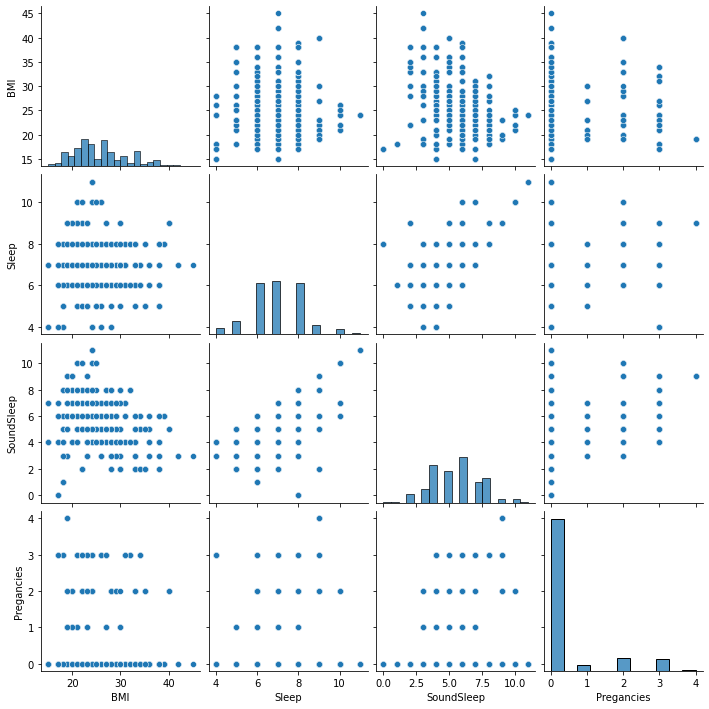

In [12]:
sns.pairplot(dataset)

# remove null

In [13]:
fill_bmi = dataset.BMI.mean()

In [14]:
dataset.BMI = dataset.BMI.fillna(fill_bmi)

In [15]:
dataset.BMI.isnull().sum()

0

In [16]:
dataset.dropna(subset=['Pdiabetes', 'Diabetic'], inplace=True)

In [17]:
dataset.isnull().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  0
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            0
UriationFreq         0
Diabetic             0
dtype: int64

In [18]:
dataset.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [19]:
fill_preg = dataset.Pregancies.median()

In [20]:
fill_preg

0.0

In [21]:
dataset.Pregancies = dataset.Pregancies.fillna(fill_preg)

In [22]:
dataset.BMI.isnull().sum()

0

In [23]:
dataset.isnull().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

# one hot encoding

In [24]:
dummie_ph = pd.get_dummies(dataset['PhysicallyActive'])

In [25]:
dummie_ph

,less than half an hr,more than half an hr,none,one hr or more
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
947,0,1,0,0
948,0,1,0,0
949,0,0,1,0
950,1,0,0,0


In [26]:
dummie_j = pd.get_dummies(dataset['JunkFood'])

In [27]:
dummie_j

,always,occasionally,often,very often
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
947,0,0,1,0
948,0,1,0,0
949,0,1,0,0
950,0,1,0,0


In [28]:
dummie_s = pd.get_dummies(dataset['Stress'])

In [29]:
dummie_s

,always,not at all,sometimes,very often
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
947,0,0,1,0
948,0,0,1,0
949,0,0,1,0
950,0,0,0,1


In [30]:
dummie_bpl = pd.get_dummies(dataset['BPLevel'])

In [31]:
dummie_bpl

,high,low,normal
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
947,0,0,1
948,1,0,0
949,1,0,0
950,1,0,0


In [32]:
marge = pd.concat([dataset,dummie_ph,dummie_j,dummie_s,dummie_bpl], axis = 'columns')

In [33]:
marge

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,...,occasionally,often,very often,always,not at all,sometimes,very often,high,low,normal
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,...,1,0,0,0,0,1,0,1,0,0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,...,0,0,1,0,0,1,0,0,0,1
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,...,1,0,0,0,0,1,0,0,0,1
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,...,1,0,0,0,0,1,0,0,0,1
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,...,0,1,0,0,0,1,0,0,0,1
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,...,1,0,0,0,0,1,0,1,0,0
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,...,1,0,0,0,0,1,0,1,0,0
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,...,1,0,0,0,0,0,1,1,0,0


In [34]:
marge.shape

(950, 33)

In [196]:
pie.pie(x,y)

NameError: name 'pie' is not defined

In [35]:
drop_phy = marge.drop(['PhysicallyActive'],axis = 'columns')

In [36]:
drop_junkfood = drop_phy.drop(['JunkFood'],axis = 'columns')

In [37]:
drop_stress = drop_junkfood.drop(['Stress'],axis = 'columns')

In [38]:
one_hot_final = drop_stress.drop(['BPLevel'],axis = 'columns')

In [39]:
one_hot_final.shape

(950, 29)

In [40]:
one_hot_final

,Age,Gender,Family_Diabetes,highBP,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,...,occasionally,often,very often,always,not at all,sometimes,very often,high,low,normal
0,50-59,Male,no,yes,39.0,no,no,8,6,no,...,1,0,0,0,0,1,0,1,0,0
1,50-59,Male,no,yes,28.0,no,no,8,6,yes,...,0,0,1,0,0,1,0,0,0,1
2,40-49,Male,no,no,24.0,no,no,6,6,no,...,1,0,0,0,0,1,0,0,0,1
3,50-59,Male,no,no,23.0,no,no,8,6,no,...,1,0,0,0,0,1,0,0,0,1
4,40-49,Male,no,no,27.0,no,no,8,8,no,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,25.0,no,no,8,6,no,...,0,1,0,0,0,1,0,0,0,1
948,60 or older,Male,yes,yes,27.0,no,no,6,5,yes,...,1,0,0,0,0,1,0,1,0,0
949,60 or older,Male,no,yes,23.0,no,no,6,5,yes,...,1,0,0,0,0,1,0,1,0,0
950,60 or older,Male,no,yes,27.0,no,yes,6,5,yes,...,1,0,0,0,0,0,1,1,0,0


# level encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
lb_en = LabelEncoder()

# labeling

In [43]:
label_age = lb_en.fit_transform(one_hot_final['Age'])

In [44]:
label_gender = lb_en.fit_transform(one_hot_final['Gender'])

In [45]:
label_family = lb_en.fit_transform(one_hot_final['Family_Diabetes'])

In [46]:
label_bp = lb_en.fit_transform(one_hot_final['highBP'])

In [47]:
label_smoke = lb_en.fit_transform(one_hot_final['Smoking'])

In [48]:
label_alco = lb_en.fit_transform(one_hot_final['Alcohol'])

In [49]:
label_medi = lb_en.fit_transform(one_hot_final['RegularMedicine'])

In [50]:
label_urin = lb_en.fit_transform(one_hot_final['UriationFreq'])

In [51]:
label_pdiabetes = lb_en.fit_transform(one_hot_final['Pdiabetes'])

In [52]:
label_diabetic = lb_en.fit_transform(one_hot_final['Diabetic'])

# drop

In [53]:
drop_age = one_hot_final.drop('Age',axis = 'columns')

In [54]:
drop_gender = drop_age.drop('Gender',axis = 'columns')

In [55]:
drop_family_diabetec = drop_gender.drop('Family_Diabetes',axis = 'columns') 

In [56]:
drop_bp = drop_family_diabetec.drop('highBP',axis = 'columns') 

In [57]:
drop_smoke = drop_bp.drop('Smoking',axis = 'columns')

In [58]:
drop_alco = drop_smoke.drop('Alcohol',axis = 'columns')

In [59]:
after_medi = drop_alco.drop('RegularMedicine', axis = 'columns')

In [60]:
after_pdiabetes = after_medi.drop('Pdiabetes', axis = 'columns')

In [61]:
after_urin = after_pdiabetes.drop('UriationFreq', axis = 'columns')

In [62]:
after_drop = after_urin.drop('Diabetic', axis = 'columns')

In [63]:
after_drop

,BMI,Sleep,SoundSleep,Pregancies,less than half an hr,more than half an hr,none,one hr or more,always,occasionally,often,very often,always,not at all,sometimes,very often,high,low,normal
0,39.0,8,6,0.0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,28.0,8,6,0.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2,24.0,6,6,0.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,23.0,8,6,0.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,27.0,8,8,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25.0,8,6,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
948,27.0,6,5,0.0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
949,23.0,6,5,0.0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
950,27.0,6,5,0.0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0


# concate

In [64]:
after_drop['Age'] = label_age

In [65]:
after_drop['Gender'] = label_gender

In [66]:
after_drop['Family_diabetes'] = label_family

In [67]:
after_drop['highBP'] = label_bp

In [68]:
after_drop['Smoking'] = label_smoke

In [69]:
after_drop['Alcohol'] = label_alco

In [70]:
after_drop['RegularMedicine'] = label_medi

In [71]:
after_drop['Pdiabetes'] = label_pdiabetes

In [72]:
after_drop['UriationFreq'] = label_urin

In [73]:
after_drop['Diabetic'] = label_diabetic

In [74]:
final = after_drop

In [75]:
final.isnull().sum()

BMI                     0
Sleep                   0
SoundSleep              0
Pregancies              0
less than half an hr    0
more than half an hr    0
none                    0
one hr or more          0
always                  0
occasionally            0
often                   0
very often              0
always                  0
not at all              0
sometimes               0
very often              0
high                    0
low                     0
normal                  0
Age                     0
Gender                  0
Family_diabetes         0
highBP                  0
Smoking                 0
Alcohol                 0
RegularMedicine         0
Pdiabetes               0
UriationFreq            0
Diabetic                0
dtype: int64

# train test

In [76]:
y = final['Diabetic']

In [77]:
y

0      0
1      0
2      0
3      0
4      0
      ..
947    1
948    1
949    0
950    0
951    1
Name: Diabetic, Length: 950, dtype: int32

In [78]:
x = final.drop('Diabetic',axis=1)

In [79]:
x

,BMI,Sleep,SoundSleep,Pregancies,less than half an hr,more than half an hr,none,one hr or more,always,occasionally,...,normal,Age,Gender,Family_diabetes,highBP,Smoking,Alcohol,RegularMedicine,Pdiabetes,UriationFreq
0,39.0,8,6,0.0,0,0,0,1,0,1,...,0,1,1,0,1,0,0,0,0,0
1,28.0,8,6,0.0,1,0,0,0,0,0,...,1,1,1,0,1,0,0,2,0,0
2,24.0,6,6,0.0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,23.0,8,6,0.0,0,0,0,1,0,1,...,1,1,1,0,0,0,0,0,0,0
4,27.0,8,8,0.0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25.0,8,6,0.0,0,1,0,0,0,0,...,1,3,1,1,0,0,0,0,0,0
948,27.0,6,5,0.0,0,1,0,0,0,1,...,0,2,1,1,1,0,0,2,0,1
949,23.0,6,5,0.0,0,0,1,0,0,1,...,0,2,1,0,1,0,0,2,0,0
950,27.0,6,5,0.0,1,0,0,0,0,1,...,0,2,1,0,1,0,1,2,0,0


# feature scalling

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
standard = StandardScaler()

In [82]:
x_stand = standard.fit_transform(x)

# data split .30

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
xtrain,xtest,ytrain,ytest = train_test_split(x_stand,y,test_size = .30,random_state = 1)

# logistic regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
lr = LogisticRegression()

In [87]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [88]:
lr.predict(xtest)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [89]:
lr.score(xtest,ytest)

0.9122807017543859

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
predict = lr.predict(xtest)

In [92]:
accuracy = accuracy_score(ytest,predict)

In [93]:
l_accuracy = accuracy*100
l_accuracy

91.22807017543859

# comparison

In [94]:
dataset_pred= pd.DataFrame()
dataset_pred['Actual Values'] = ytest
dataset_pred['Predicted Values'] = predict

dataset_pred.head(10)

,Actual Values,Predicted Values
243,1,1
845,0,0
416,0,1
735,1,1
545,1,1
311,1,1
868,0,0
852,0,0
35,1,1
78,0,0


# ploting the comaprison

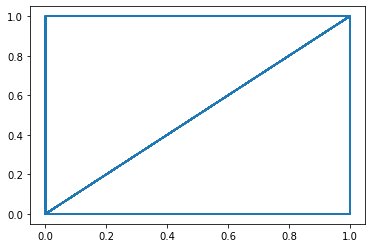

In [95]:
plt.plot(predict,ytest)

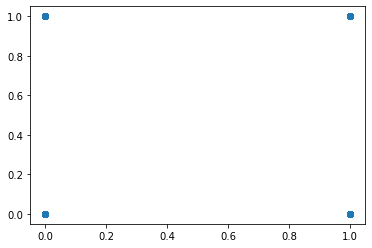

In [96]:
plt.scatter(ytest,predict)
plt.show()

# evaluating the model

In [97]:
from sklearn import metrics

In [98]:
metrics.mean_absolute_error(ytest,predict)

0.08771929824561403

In [99]:
metrics.mean_squared_error(ytest,predict)

0.08771929824561403

In [100]:
np.sqrt(metrics.mean_squared_error(ytest,predict))

0.2961744388795462

# confusion matrix

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
confusion_matrix(ytest,predict)

array([[195,  10],
       [ 15,  65]], dtype=int64)

In [103]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       205
           1       0.87      0.81      0.84        80

    accuracy                           0.91       285
   macro avg       0.90      0.88      0.89       285
weighted avg       0.91      0.91      0.91       285



# suppoet vector machine

In [105]:
from sklearn.svm import SVC
model = SVC()

In [106]:
model.fit(xtrain,ytrain)

SVC()

In [107]:
predict = model.predict(xtest)

In [108]:
dataset_pred= pd.DataFrame()
dataset_pred['Actual Values'] = ytest
dataset_pred['Predicted Values'] = predict

dataset_pred.head(10)

,Actual Values,Predicted Values
243,1,1
845,0,0
416,0,0
735,1,1
545,1,1
311,1,1
868,0,0
852,0,0
35,1,1
78,0,0


In [109]:
model.score(xtest,ytest)

0.9578947368421052

In [110]:
accuracy = accuracy_score(ytest,predict)

In [111]:
s_accuracy = accuracy*100
s_accuracy

95.78947368421052

In [112]:
confusion_matrix(ytest,predict)

array([[202,   3],
       [  9,  71]], dtype=int64)

In [113]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       205
           1       0.96      0.89      0.92        80

    accuracy                           0.96       285
   macro avg       0.96      0.94      0.95       285
weighted avg       0.96      0.96      0.96       285



# naive bayes

In [114]:
from sklearn.naive_bayes import MultinomialNB

In [115]:
reg = MultinomialNB()

In [116]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .30,random_state = 1)
reg.fit(xtrain,ytrain)

MultinomialNB()

In [117]:
predict = reg.predict(xtest)

In [118]:
dataset_pred= pd.DataFrame()
dataset_pred['Actual Values'] = ytest
dataset_pred['Predicted Values'] = predict

dataset_pred.head(10)

,Actual Values,Predicted Values
243,1,1
845,0,0
416,0,1
735,1,1
545,1,1
311,1,1
868,0,0
852,0,0
35,1,0
78,0,0


In [119]:
reg.score(xtest,ytest)

0.8771929824561403

In [120]:
accuracy = accuracy_score(ytest,predict)

In [121]:
n_accuracy  = accuracy*100
n_accuracy

87.71929824561403

In [122]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       205
           1       0.76      0.81      0.79        80

    accuracy                           0.88       285
   macro avg       0.84      0.86      0.85       285
weighted avg       0.88      0.88      0.88       285



# train test part 2

In [123]:
x1train,x1test,y1train,y1test = train_test_split(x_stand,y,test_size = .25,random_state = 1)

In [124]:
lr.fit(x1train,y1train)

LogisticRegression()

In [125]:
predict = lr.predict(x1test)

In [126]:
accuracy = accuracy_score(y1test,predict)

In [127]:
l1_accuracy = accuracy*100
l1_accuracy

91.17647058823529

In [128]:
print(classification_report(y1test,predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       171
           1       0.88      0.79      0.83        67

    accuracy                           0.91       238
   macro avg       0.90      0.88      0.89       238
weighted avg       0.91      0.91      0.91       238



# support vector machine

In [129]:
model.fit(x1train,y1train)

SVC()

In [130]:
predict = model.predict(x1test)

In [131]:
accuracy = accuracy_score(y1test,predict)

In [132]:
s1_accuracy = accuracy*100
s1_accuracy

94.9579831932773

In [133]:
print(classification_report(y1test,predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       171
           1       0.95      0.87      0.91        67

    accuracy                           0.95       238
   macro avg       0.95      0.92      0.94       238
weighted avg       0.95      0.95      0.95       238



# naive bayes

In [134]:
x1train,x1test,y1train,y1test = train_test_split(x,y,test_size = .25,random_state = 1)
reg.fit(x1train,y1train)

MultinomialNB()

In [135]:
predict = model.predict(x1test)

In [136]:
accuracy = accuracy_score(y1test,predict)

In [137]:
n1_accuracy = accuracy*100
n1_accuracy

71.84873949579831

In [138]:
print(classification_report(y1test,predict))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       171
           1       0.00      0.00      0.00        67

    accuracy                           0.72       238
   macro avg       0.36      0.50      0.42       238
weighted avg       0.52      0.72      0.60       238



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# spliting

In [139]:
x2train,x2test,y2train,y2test = train_test_split(x_stand,y,test_size = .40,random_state = 1)

# logistic regression

In [140]:
lr.fit(x2train,y2train)

LogisticRegression()

In [141]:
predict = lr.predict(x2test)

In [142]:
accuracy = accuracy_score(y2test,predict)

In [143]:
l2_accuracy = accuracy*100
l2_accuracy

90.78947368421053

In [144]:
print(classification_report(y2test,predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       274
           1       0.82      0.86      0.84       106

    accuracy                           0.91       380
   macro avg       0.88      0.89      0.89       380
weighted avg       0.91      0.91      0.91       380



# svm

In [145]:
model.fit(x2train,y2train)

SVC()

In [146]:
predict = model.predict(x2test)

In [147]:
accuracy = accuracy_score(y2test,predict)

In [148]:
s2_accuracy = accuracy*100
s2_accuracy

93.15789473684211

In [149]:
print(classification_report(y2test,predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       274
           1       0.89      0.86      0.88       106

    accuracy                           0.93       380
   macro avg       0.92      0.91      0.91       380
weighted avg       0.93      0.93      0.93       380



# naive bayes

In [150]:
x2train,x2test,y2train,y2test = train_test_split(x,y,test_size = .40,random_state = 1)
reg.fit(x2train,y2train)

MultinomialNB()

In [151]:
predict = reg.predict(x2test)

In [152]:
accuracy = accuracy_score(y2test,predict)

In [153]:
n2_accuracy = accuracy*100
n2_accuracy

85.26315789473684

In [154]:
print(classification_report(y2test,predict))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       274
           1       0.70      0.81      0.75       106

    accuracy                           0.85       380
   macro avg       0.81      0.84      0.82       380
weighted avg       0.86      0.85      0.86       380



# data split .20

In [155]:
x3train,x3test,y3train,y3test = train_test_split(x_stand,y,test_size = .20,random_state = 1)

In [156]:
lr.fit(x3train,y3train)

LogisticRegression()

In [157]:
predict = lr.predict(x3test)

In [158]:
accuracy = accuracy_score(y3test,predict)

In [159]:
l3_accuracy = accuracy*100
l3_accuracy

90.52631578947368

In [160]:
print(classification_report(y3test,predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       135
           1       0.89      0.76      0.82        55

    accuracy                           0.91       190
   macro avg       0.90      0.86      0.88       190
weighted avg       0.90      0.91      0.90       190



# svm

In [161]:
model.fit(x3train,y3train)

SVC()

In [162]:
predict = model.predict(x3test)

In [163]:
accuracy = accuracy_score(y3test,predict)

In [164]:
s3_accuracy = accuracy*100
s3_accuracy

94.73684210526315

In [165]:
print(classification_report(y3test,predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       135
           1       0.96      0.85      0.90        55

    accuracy                           0.95       190
   macro avg       0.95      0.92      0.93       190
weighted avg       0.95      0.95      0.95       190



# naive bayes

In [166]:
x3train,x3test,y3train,y3test = train_test_split(x,y,test_size = .20,random_state = 1)
reg.fit(x3train,y3train)

MultinomialNB()

In [167]:
predict = reg.predict(x3test)

In [168]:
accuracy = accuracy_score(y3test,predict)

In [169]:
n3_accuracy = accuracy*100
n3_accuracy

86.8421052631579

In [170]:
print(classification_report(y3test,predict))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       135
           1       0.76      0.80      0.78        55

    accuracy                           0.87       190
   macro avg       0.84      0.85      0.84       190
weighted avg       0.87      0.87      0.87       190



# RF

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
rfcl = RandomForestClassifier()

# split .30

In [173]:
rfcl.fit(xtrain,ytrain)

RandomForestClassifier()

In [174]:
predict = rfcl.predict(xtest)

In [175]:
accuracy = accuracy_score(ytest,predict)
rm1_accuracy = accuracy*100
rm1_accuracy

95.78947368421052

In [176]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       205
           1       0.93      0.93      0.93        80

    accuracy                           0.96       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.96      0.96       285



# spliting .30

In [177]:
rfcl.fit(x1train,y1train)

RandomForestClassifier()

In [178]:
predict = rfcl.predict(x1test)

In [179]:
accuracy = accuracy_score(y1test,predict)
rm2_accuracy = accuracy*100
rm2_accuracy

97.47899159663865

In [180]:
print(classification_report(y1test,predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       171
           1       0.97      0.94      0.95        67

    accuracy                           0.97       238
   macro avg       0.97      0.96      0.97       238
weighted avg       0.97      0.97      0.97       238



# spliting .40

In [181]:
rfcl.fit(x2train,y2train)

RandomForestClassifier()

In [182]:
predict = rfcl.predict(x2test)

In [183]:
accuracy = accuracy_score(y2test,predict)
rm3_accuracy = accuracy*100
rm3_accuracy

95.78947368421052

In [184]:
print(classification_report(y2test,predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       274
           1       0.92      0.93      0.93       106

    accuracy                           0.96       380
   macro avg       0.95      0.95      0.95       380
weighted avg       0.96      0.96      0.96       380



# spliting

In [185]:
rfcl.fit(x3train,y3train)

RandomForestClassifier()

In [186]:
predict = rfcl.predict(x3test)

In [187]:
accuracy = accuracy_score(y3test,predict)
rm4_accuracy = accuracy*100
rm4_accuracy

97.36842105263158

In [188]:
print(classification_report(y3test,predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       135
           1       0.96      0.95      0.95        55

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190



# model comparison

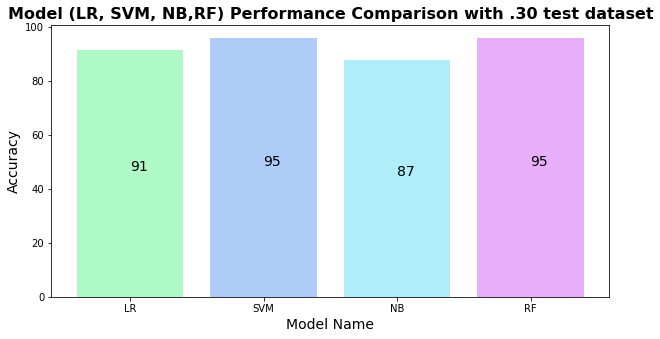

In [189]:
accuracy1 = [l_accuracy, s_accuracy, n_accuracy,rm1_accuracy]
model_names = ['LR', 'SVM', 'NB','RF']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy1, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, SVM, NB,RF) Performance Comparison with .30 test dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

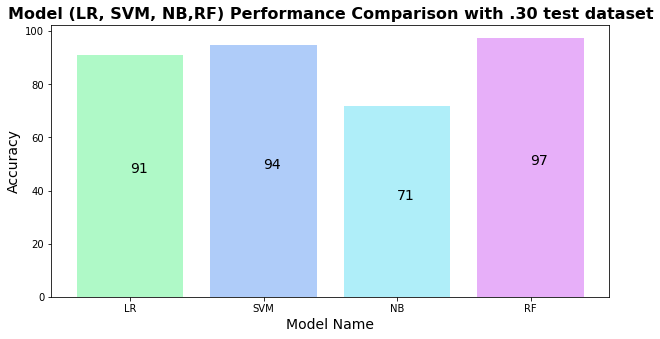

In [190]:
accuracy2 = [l1_accuracy, s1_accuracy, n1_accuracy,rm2_accuracy]
model_names = ['LR', 'SVM', 'NB','RF']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy2, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, SVM, NB,RF) Performance Comparison with .30 test dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

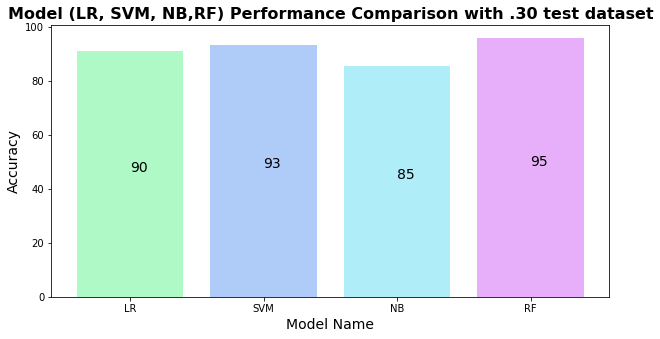

In [191]:
accuracy3 = [l2_accuracy, s2_accuracy, n2_accuracy,rm3_accuracy]
model_names = ['LR', 'SVM', 'NB','RF']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy3, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, SVM, NB,RF) Performance Comparison with .30 test dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

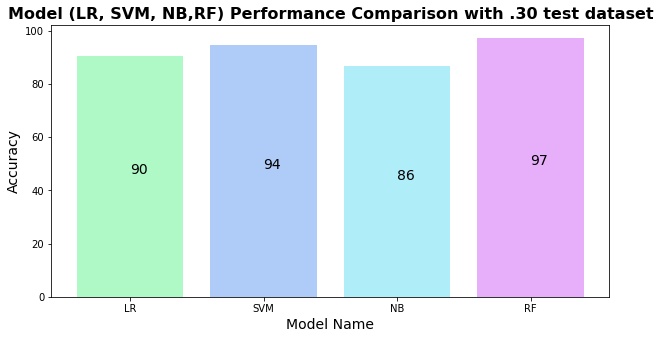

In [192]:
accuracy4 = [l3_accuracy, s3_accuracy, n3_accuracy,rm4_accuracy]
model_names = ['LR', 'SVM', 'NB','RF']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy4, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, SVM, NB,RF) Performance Comparison with .30 test dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()